# QAQC

1. Verify that Beaufort Sea region and locations for Utqiaġvik look okay.

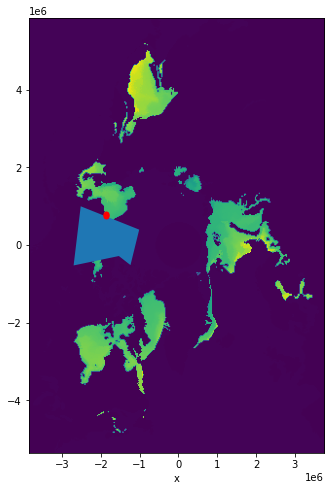

In [890]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

with rio.open(f"netcdf:{orac_fp}:DOA") as src:
    show(src, ax=ax)
    
beaufort_poly.plot(ax=ax)

utqiagvik_poi = poi_coords[poi_coords["location"] == "Utqiaġvik"][["x", "y"]]
utqiagvik_poi.plot(
    x="x", y="y", style=".", color="red", ax=ax, ms=10, legend=False
)

plt.show()

2. Verify mean aggregation of point extractions

In [322]:
import warnings

def rm_nan(arr):
    return arr[~np.isnan(arr)]

# ignore warnings for mean of NaNs (RuntimeWarning) and indexing (PerformanceWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    manual_utq_means = np.nanmean(
        np.array(
            [
                fubu["breakup_start"].sel(xc=row[1]["x"], yc=row[1]["y"]).values
                for row in utqiagvik_poi.iterrows()
            ]
        ),
        axis=0,
    )
    # subset to Utqiagvik
    temp_utqiagvik = poi_masie_df.set_index(["point_name", "indicator", "type"]).loc[("Utqiaġvik", "Break-up Start")]
    original_utq_means = temp_utqiagvik.loc[("Location")]["mean_date"].values

print("Manual means match original means:", np.all(rm_nan(manual_utq_means) == rm_nan(original_utq_means)))

Manual means match original means: True
